# **Hacktiv8 Talent Fair**

## ARIA - Plant Nutritional Prediction

`Julio Muhammad Rizki`


# Introduction

Identitas peneliti : Julio Muhammad Rizki, Data Science Graduate from Hacktiv8

Penelitian ini dibuat untuk membuat sebuah model machine learning yang dapat membuat prediksi nutrisi tanaman. Data yang disediakan berasal dari ARIA, sebuah perusahaan yang bergerak di bidang agriculture dan biotechnology.

Isi dan deskripsi data adalah sebagai berikut :
- target : informasi mengenai nutrisi tanaman
- v1 - v8 : informasi mengenai variabel yang dapat digunakan untuk memprediksi nutrisi tanaman
- sample_type : informasi mengenai 2 lab berbeda tempat pengambilan sample

Untuk mencoba hasil dari model yang telah dibuat, silahkan kunjungi link deployment dibawah ini...

Deployment Link : https://huggingface.co/spaces/juliomrizki/plant-nutrition-predict

# Library Import

Berikut adalah library yang akan digunakan oleh peneliti.

In [1]:
# import library yang akan digunakan

import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings(action='ignore')

import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

import joblib

# Data Loading

Data akan diinput dan dilakukan data cleaning apabila dibutuhkan.

In [2]:
df = pd.read_excel('aria_data.xlsx')

In [3]:
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [4]:
df.tail()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.2500,361.250000,643.125000,489.812500,666.875,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.3750,398.125000,678.250000,541.125000,704.000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.0000,382.866667,657.466667,505.066667,719.200,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.3125,366.750000,642.937500,483.687500,675.625,359.062500,730.125000,3859.062500,lab 2
159,4.43,575.2000,350.266667,648.333333,495.400000,679.800,346.266667,718.733333,3903.333333,lab 2


In [5]:
df.shape

(160, 10)

Pengecekan mengenai type masing-masing kolom.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


Berikutnya dilakukan pengecekan terhadap missing value dengan heatmap untuk mengecek apakah terdapat kekosongan data/data yang hilang pada keseluruhan data (file yang diterima).

<AxesSubplot:>

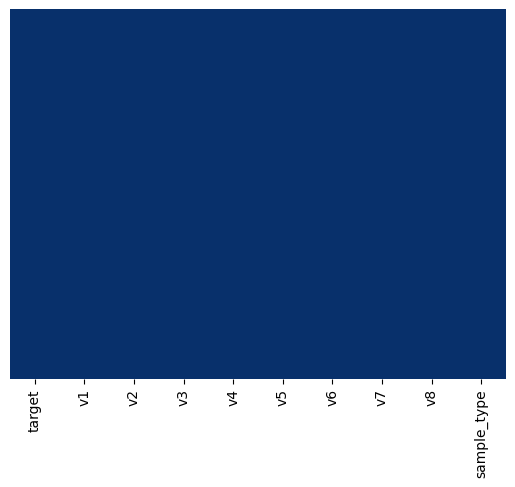

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues_r')

Dilakukan juga pengecekan apakah terdapat duplikasi data. Jika terdapat duplikasi data, kemungkinan peneliti akan membuangnya karena dapat mengganggu kemampuan model machine learning untuk mempelajari pola data.

In [8]:
df[df.duplicated()].shape

(0, 10)

Dari hasil pencarian diatas, tidak ditemukan adanya data yang duplikat.

Berikut adalah deskripsi data sederhana untuk membantu peneliti melihat gambaran data (pada kolom numeric).

In [9]:
df.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,4.73375,389.892437,237.442677,480.573041,394.109622,487.316520,251.450820,714.737926,4456.913233
std,0.21405,148.673511,70.128690,118.798984,63.060442,100.941711,59.634652,51.148098,335.035933
min,4.13000,227.285714,178.800000,348.933333,313.733333,373.333333,189.200000,586.266667,3725.666667
25%,4.60000,268.608333,194.029018,384.419643,353.181250,418.583333,213.000000,678.385417,4273.437500
50%,4.72000,295.162500,204.187500,414.383929,370.741667,456.031250,226.062500,718.833333,4554.766667
75%,4.89000,536.409375,244.716667,591.611404,424.131250,496.475000,262.531250,751.446875,4700.612500
max,5.26000,678.375000,422.812500,722.312500,558.500000,721.000000,415.375000,853.466667,5086.375000


# Exploratory Data Analysis

Selanjutnya akan dilakukan eksplorasi data sederhana agar peneliti dan pembaca dapat mengerti gambaran data yang ada.

Pertama-tama, akan dilihat korelasi dari masing-masing kolom terhadap 1 sama lain apakah saling berkaitan berdasarkan pola data.

In [10]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']


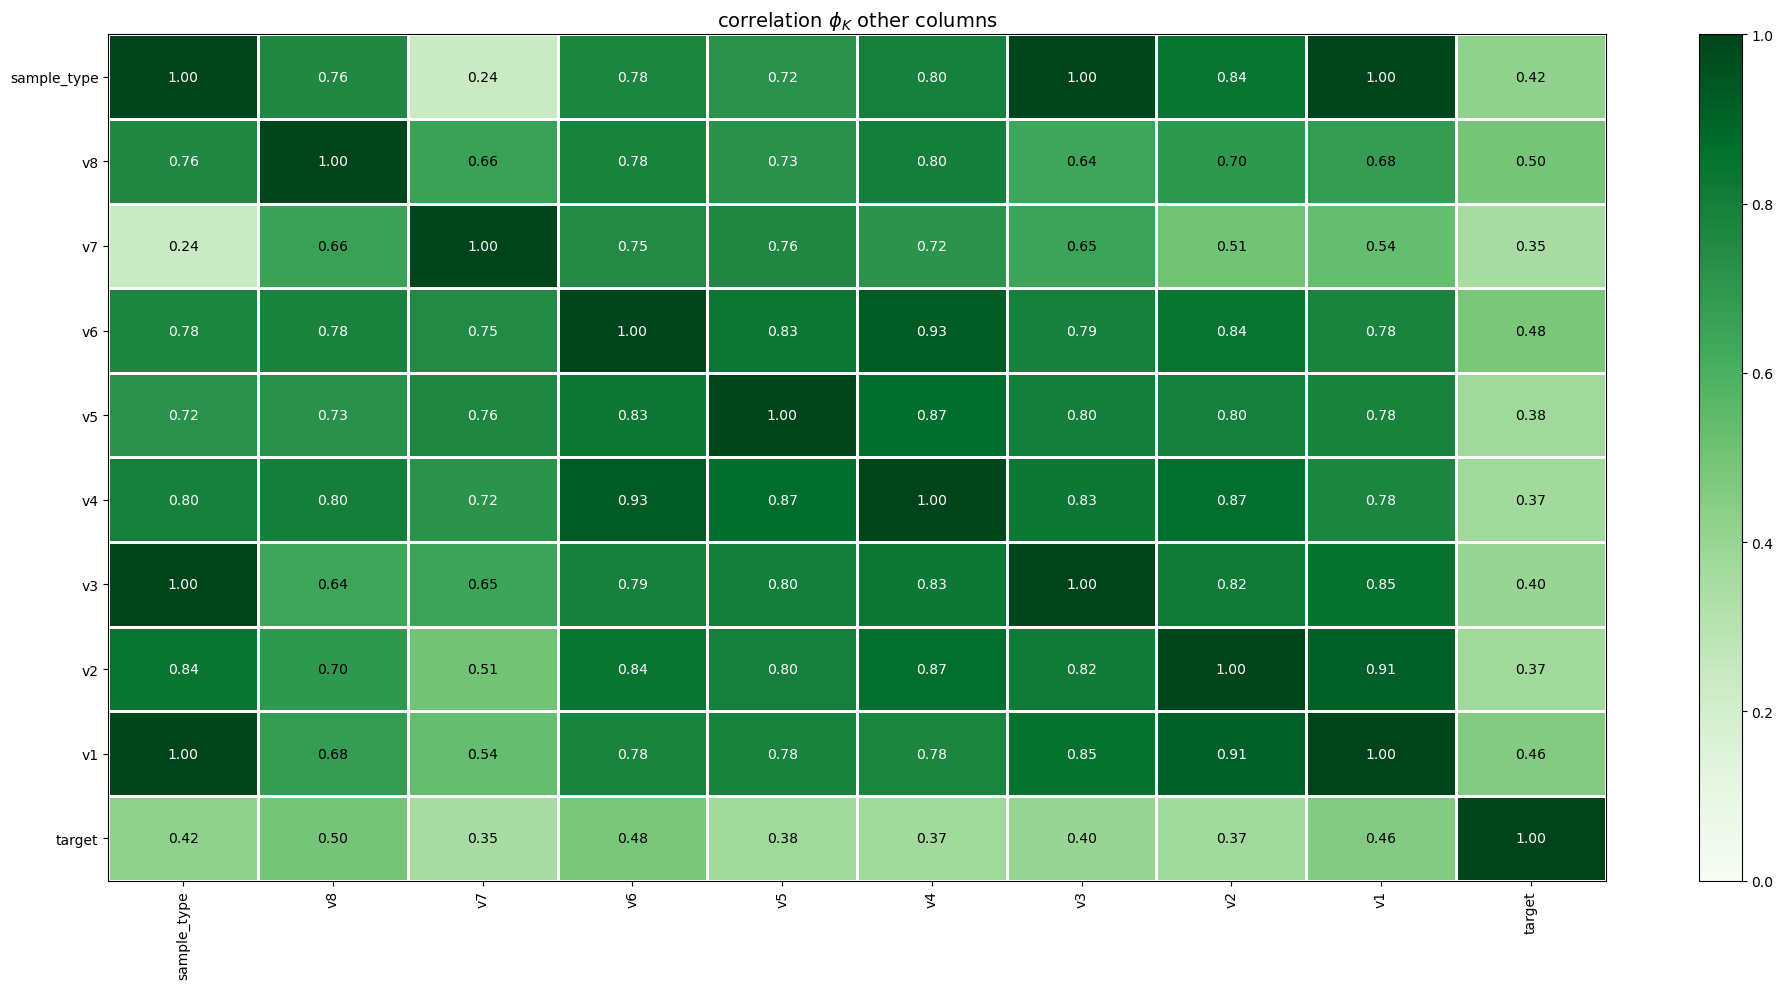

In [11]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ other columns", 
                        fontsize_factor=1, 
                        figsize=(20,10))
plt.show()

Masing-masing kolom cukup berhubungan dengan baik terhadap kolom 'target'. Untuk memudahkan analisa, berikut dibawah adalah tingkat korelasi kolum lainnya terhadap kolum target berdasarkan urutan terbesar hingga terkecil.

In [12]:
phik_val = df.phik_matrix().target

phik_val.sort_values(ascending=False)

interval columns not set, guessing: ['target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']


target         1.000000
v8             0.499367
v6             0.480621
v1             0.459417
sample_type    0.424614
v3             0.401402
v5             0.378586
v4             0.374938
v2             0.373085
v7             0.348524
Name: target, dtype: float64

Berikut akan dilihat sebaran data dari masing-masing kolom numerical beserta nilai skew mengenai apakah data terdistribusi normal atau tidak.

Skewness of target: -0.15828173643344287
Skewness of v1: 0.6399112607855549
Skewness of v2: 1.4617281099191999
Skewness of v3: 0.6026551795688342
Skewness of v4: 1.1436931932699348
Skewness of v5: 1.2706398850462628
Skewness of v6: 1.2954833782360857
Skewness of v7: -0.10723483952914095
Skewness of v8: -0.7664435142947442


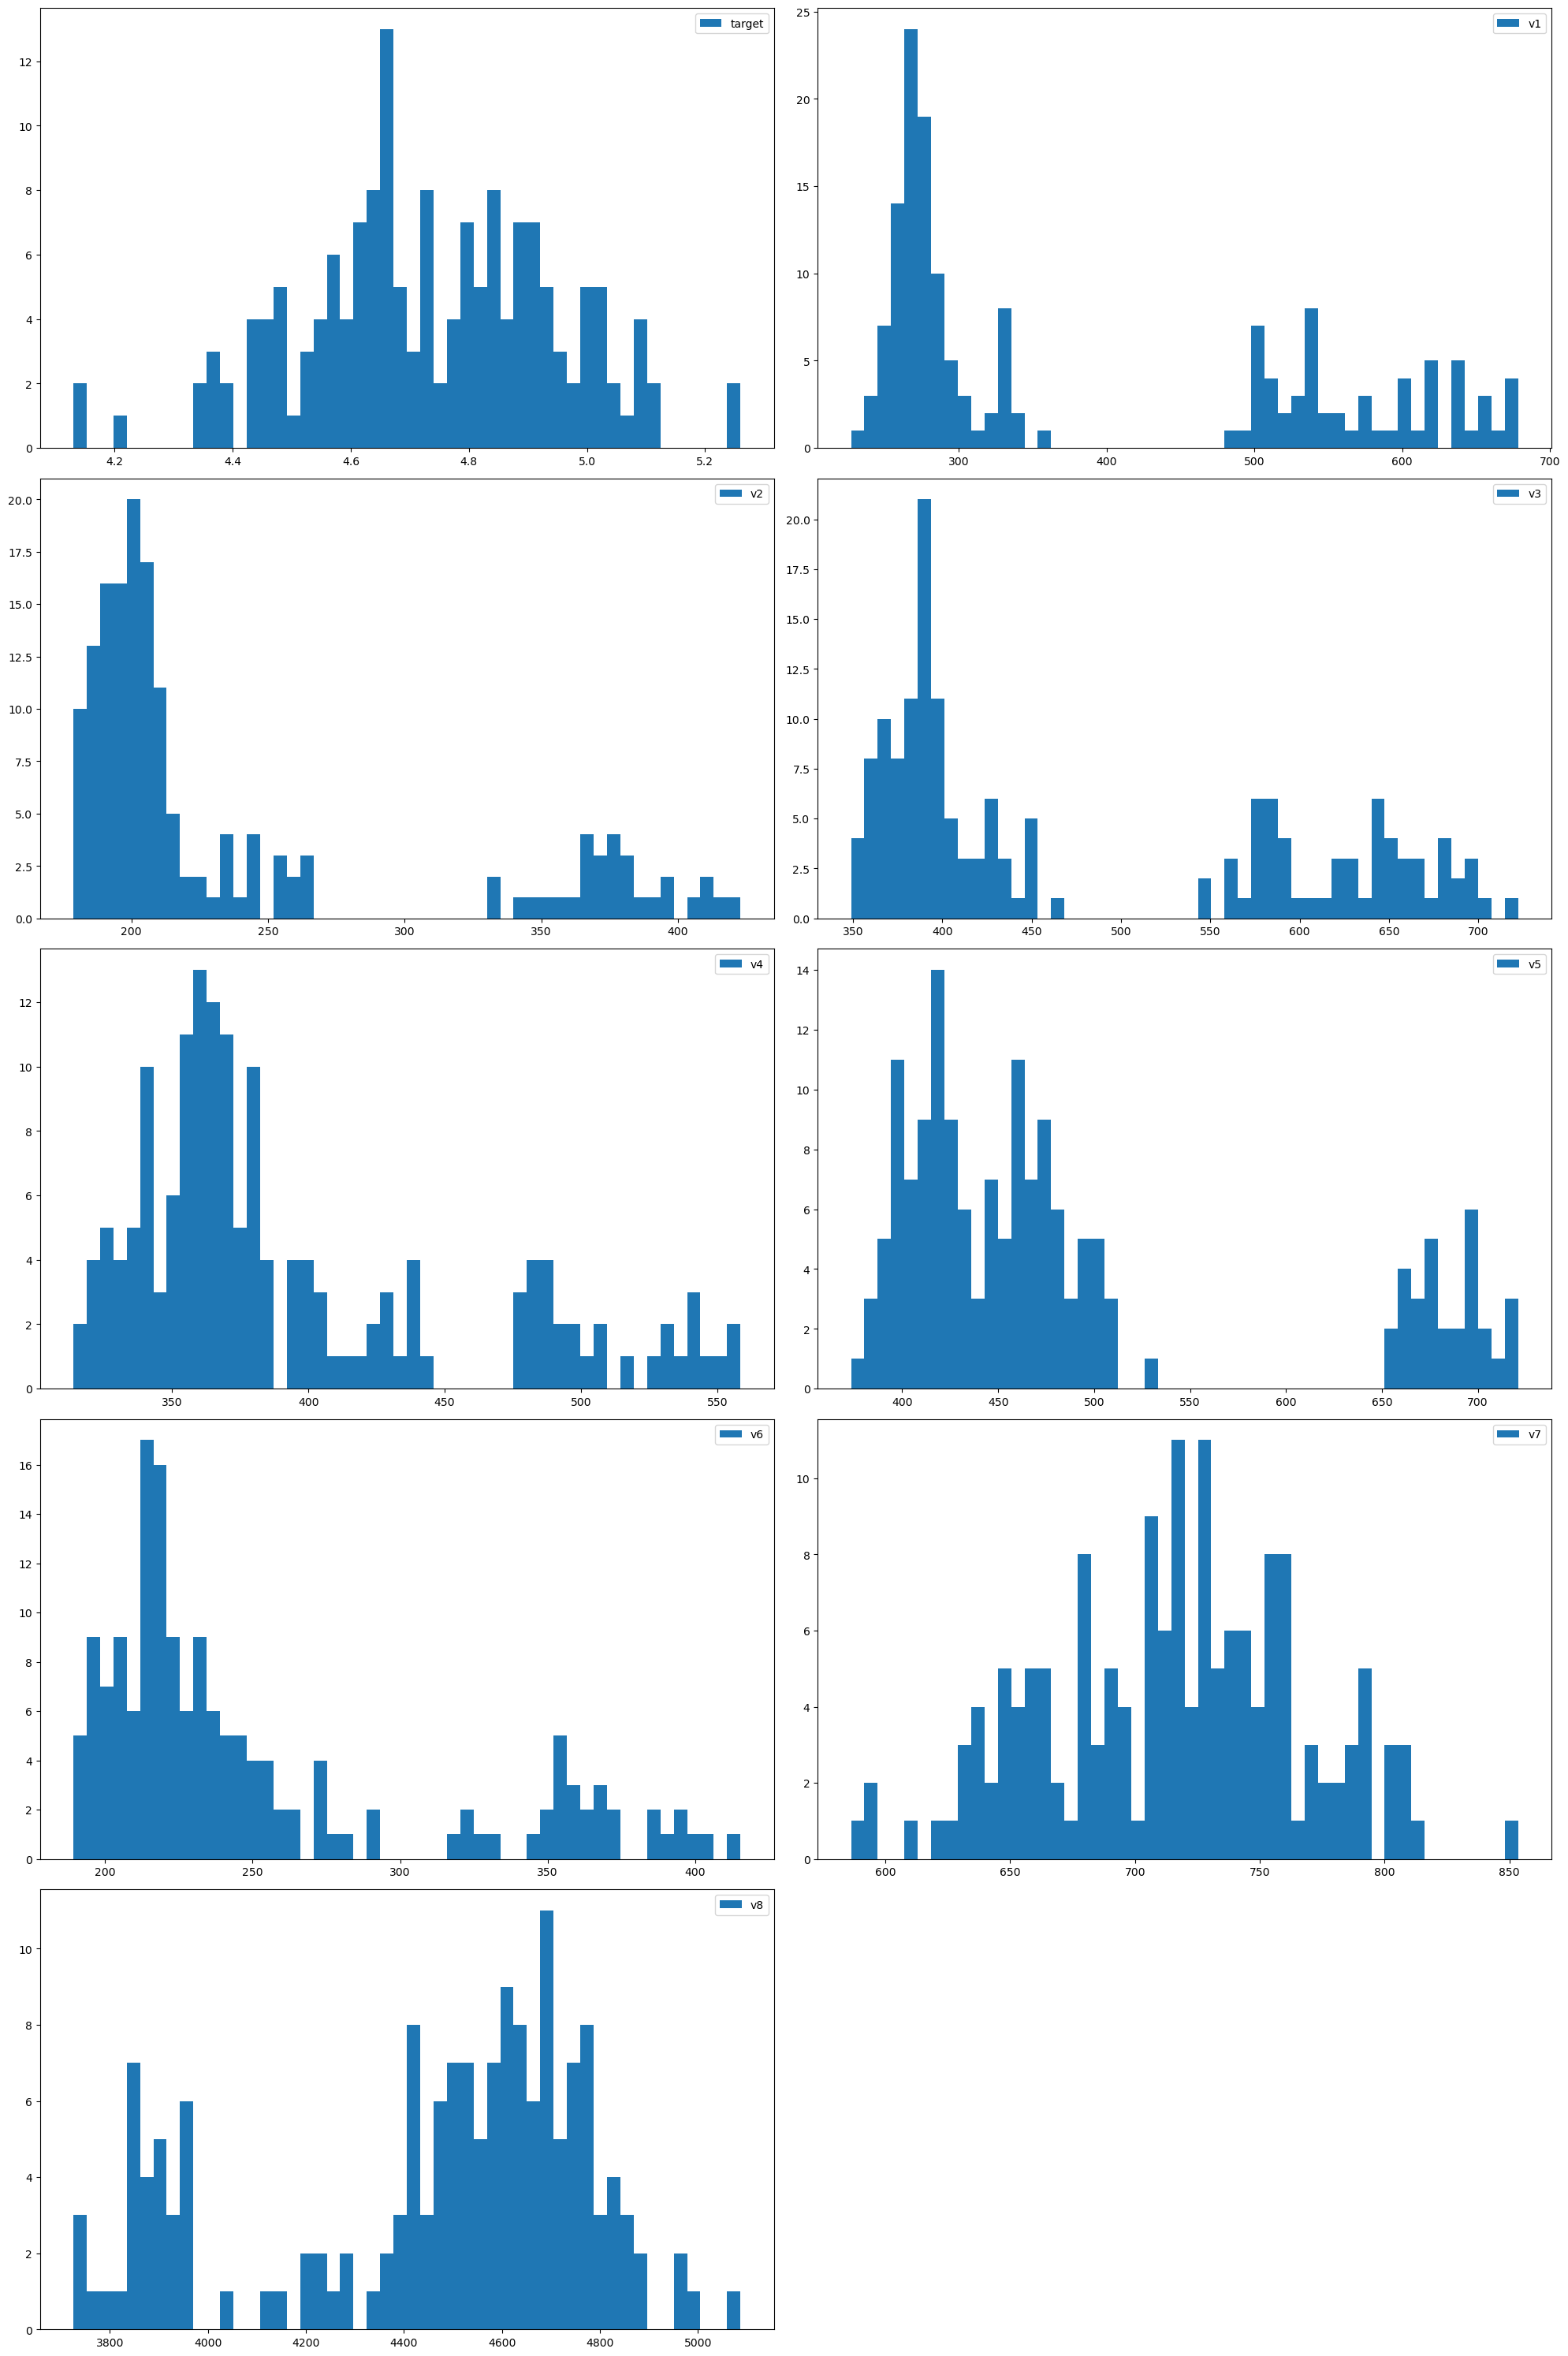

In [13]:
plt.figure(figsize=(20,30))
# Loop through each column in the DataFrame
for i, column in enumerate(df.columns):
    # Check if the column is numerical
    if df[column].dtype in [np.number]:
        plt.subplot(5,2, i + 1)
        plt.hist(df[column], bins=50, label=column)
        plt.legend()
        print(f"Skewness of {column}: {df[column].skew()}")

plt.tight_layout()
plt.show()

Berdasarkan tingkat skew diatas, ditemukan bahwa mayoritas kolum memiliki nilai diatas 0.5 atau dibawah -0.5. Hal ini menunjukkan bahwa pada kolom-kolom tersebut terdapat distribusi data yang kurang normal. Distribusi data tidak normal ini nantinya akan di handle pada segment 'Data Preprocessing'.

Berikutnya adalah sebaran data dari kolom sample_type. Terdapat 100 data pada 'lab 1' dan 60 data pada 'lab 2'.

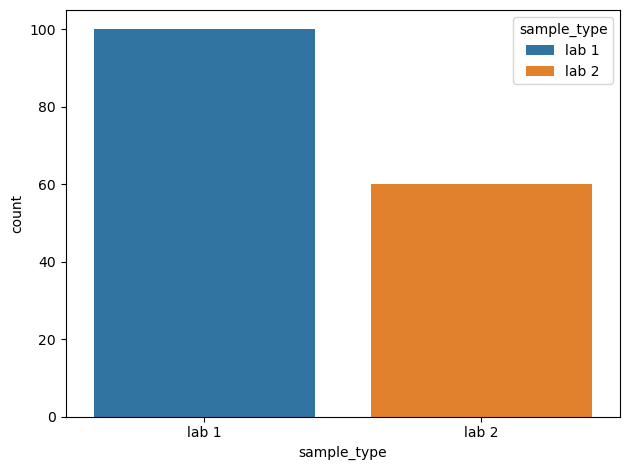

In [14]:
sns.countplot(x='sample_type',data=df,hue='sample_type', dodge=False,order = df['sample_type'].value_counts().index)
plt.tight_layout()

# Data Preprocessing

Dikarenakan distribusi data yang kurang normal pada pencarian sebelumnya, maka peneliti memutuskan untuk melakukan log-transformation untuk mengurangi ketidak-normalan pada distribusi data atau skewness pada data.

In [15]:
cols = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']

for col in cols:
    df[col] = np.log(1 + df[col])

Data kemudian akan di split kepada data_train untuk dilakukan pelatihan nantinya pada model, dan data_test untuk mengevaluasi kinerja model yang telah dibuat.

In [16]:
data_train, data_test = train_test_split(df, test_size=0.2, random_state=14)

print('Train Size : ', data_train.shape)
print('Test Size  : ', data_test.shape)

Train Size :  (128, 10)
Test Size  :  (32, 10)


Berikutnya akan dilakukan pengecekan pada outlier. 

Outlier sendiri atau anomali data adalah nilai pada data yang memiliki angka jauh diatas atau jauh dibawah rata-rata dan nilai tengah. Pada contohnya, dalam sebuah kelas setiap anak memiliki 2 pulpen namun Jono memiliki 15 pulpen, maka Jono dianggap outlier. Pada kasus ini akan dicari outlier pada kolom v1 sampai v2 dimana kolom-kolom tersebut akan digunakan untuk memprediksi nilai nutrisi nantinya pada kolom target.

Apabila ditemukan masih adanya outlier, maka outlier akan di handle dengan cara dibuang atau dilakukan capping (pembatasan nilai atas dan nilai bawah).

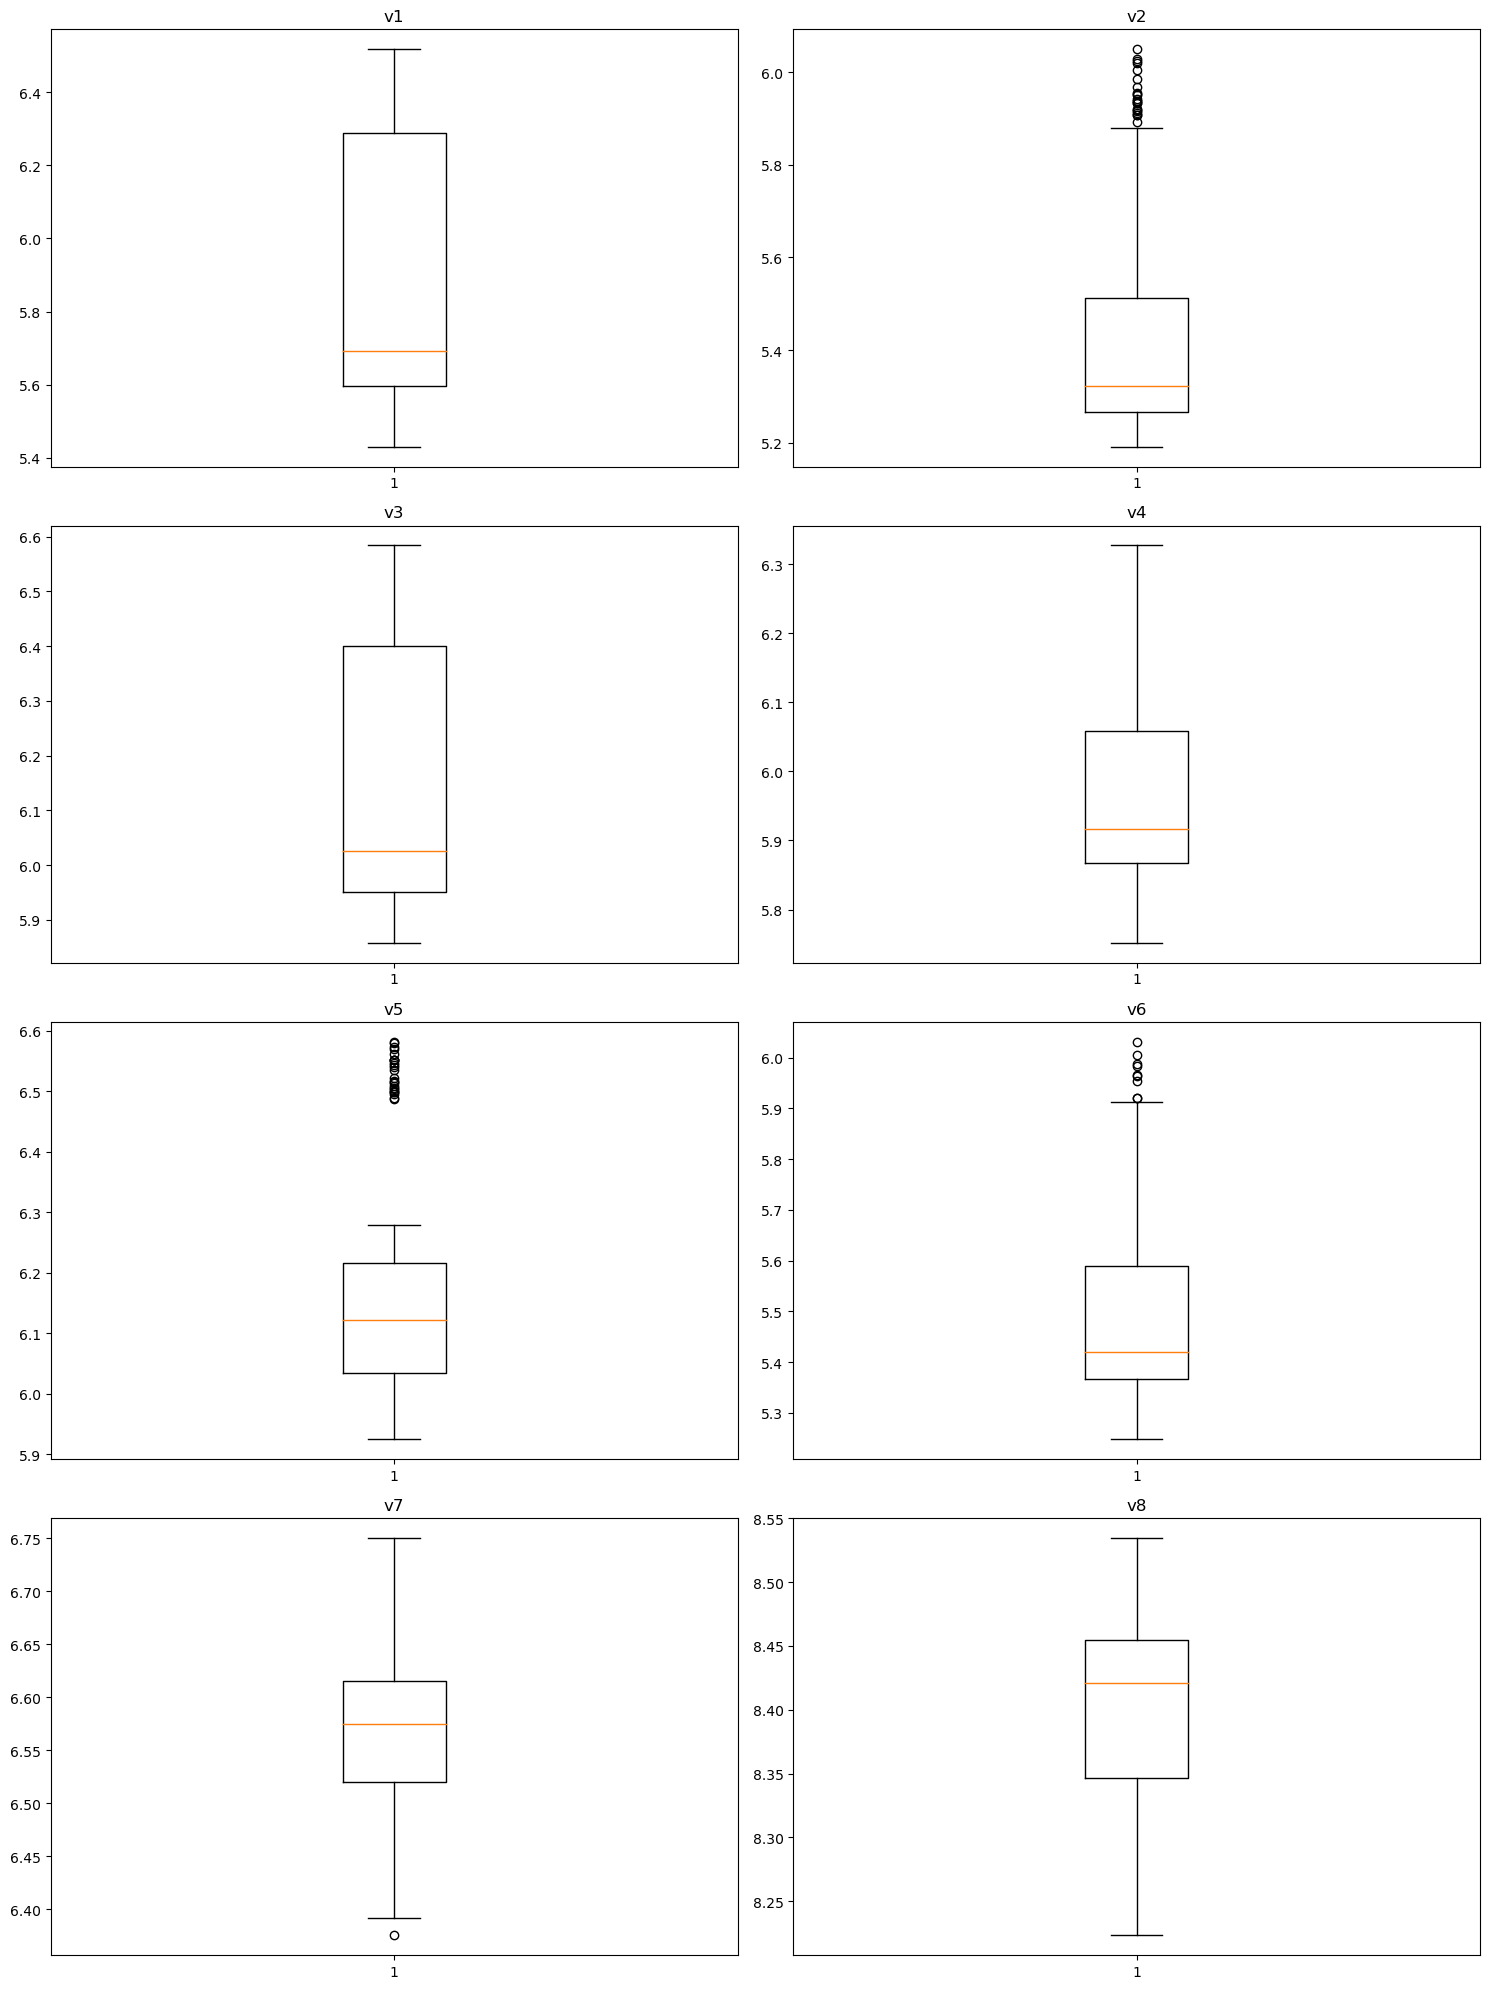

In [17]:
plt.figure(figsize=(15,20))

for i, column in enumerate(cols):
    plt.subplot(4,2, i + 1)
    plt.boxplot(data_train[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi diatas, ditemukan adanya outlier pada kolom v2, v5, dan v6. Berikut akan dilakukan pengecekan seberapa banyak outlier yang ada pada kolom-kolom tersebut.

In [18]:
def cek_outlier(cols):
  skew =data_train[cols].skew()
  if skew>=-0.5 and skew<=0.5:
    upper_boundary =data_train[cols].mean() + 3*data_train[cols].std()
    lower_boundary =data_train[cols].mean() - 3*data_train[cols].std()
  else:
    Q1 = np.quantile(data_train[cols], 0.25)
    Q3 = np.quantile(data_train[cols], 0.75)
    IQR =  Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR
    lower_boundary = Q1 - 1.5 * IQR

  outliers = data_train[(data_train[cols]<lower_boundary) | (data_train[cols]>upper_boundary)]
  data_clean = data_train[(data_train[cols]>=lower_boundary) & (data_train[cols]<=upper_boundary)]
  outliers_percent = len(outliers) / len(data_train) * 100

  return data_clean, outliers, outliers_percent

In [19]:
for col in cols:
    df2, outliers, outliers_percent = cek_outlier(col)
    print(f"Percentage of outliers removed from {col}: {outliers_percent:.2f}%")

Percentage of outliers removed from v1: 0.00%
Percentage of outliers removed from v2: 17.19%
Percentage of outliers removed from v3: 0.00%
Percentage of outliers removed from v4: 0.00%
Percentage of outliers removed from v5: 20.31%
Percentage of outliers removed from v6: 7.03%
Percentage of outliers removed from v7: 0.00%
Percentage of outliers removed from v8: 0.00%


Hasil temuan diatas menjelaskan bahwa terdapat 17% outlier di kolom v2, 20% outlier di kolom v5, dan 7% outlier di kolom v6. Karena tingginya jumlah outlier pada masing-masing kolom, maka peneliti memutuskan tidak membuang outlier tersebut. Pada kolom-kolom tersebut akan dilakukan capping, dimana outlier yang ada akan dibatasi pada batas atas masing-masing kolom (dihitung berdasarkan rata-rata, quartal atas, dan quartal bawah). 

In [20]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['v2', 'v5', 'v6'])

data_train = wins.fit_transform(data_train)

Setelah dilakukan capping, terlihat sebagaimana pada visualisasi dibawah bahwa sudah tidak adanya outlier atau anomali pada pada semua kolom.

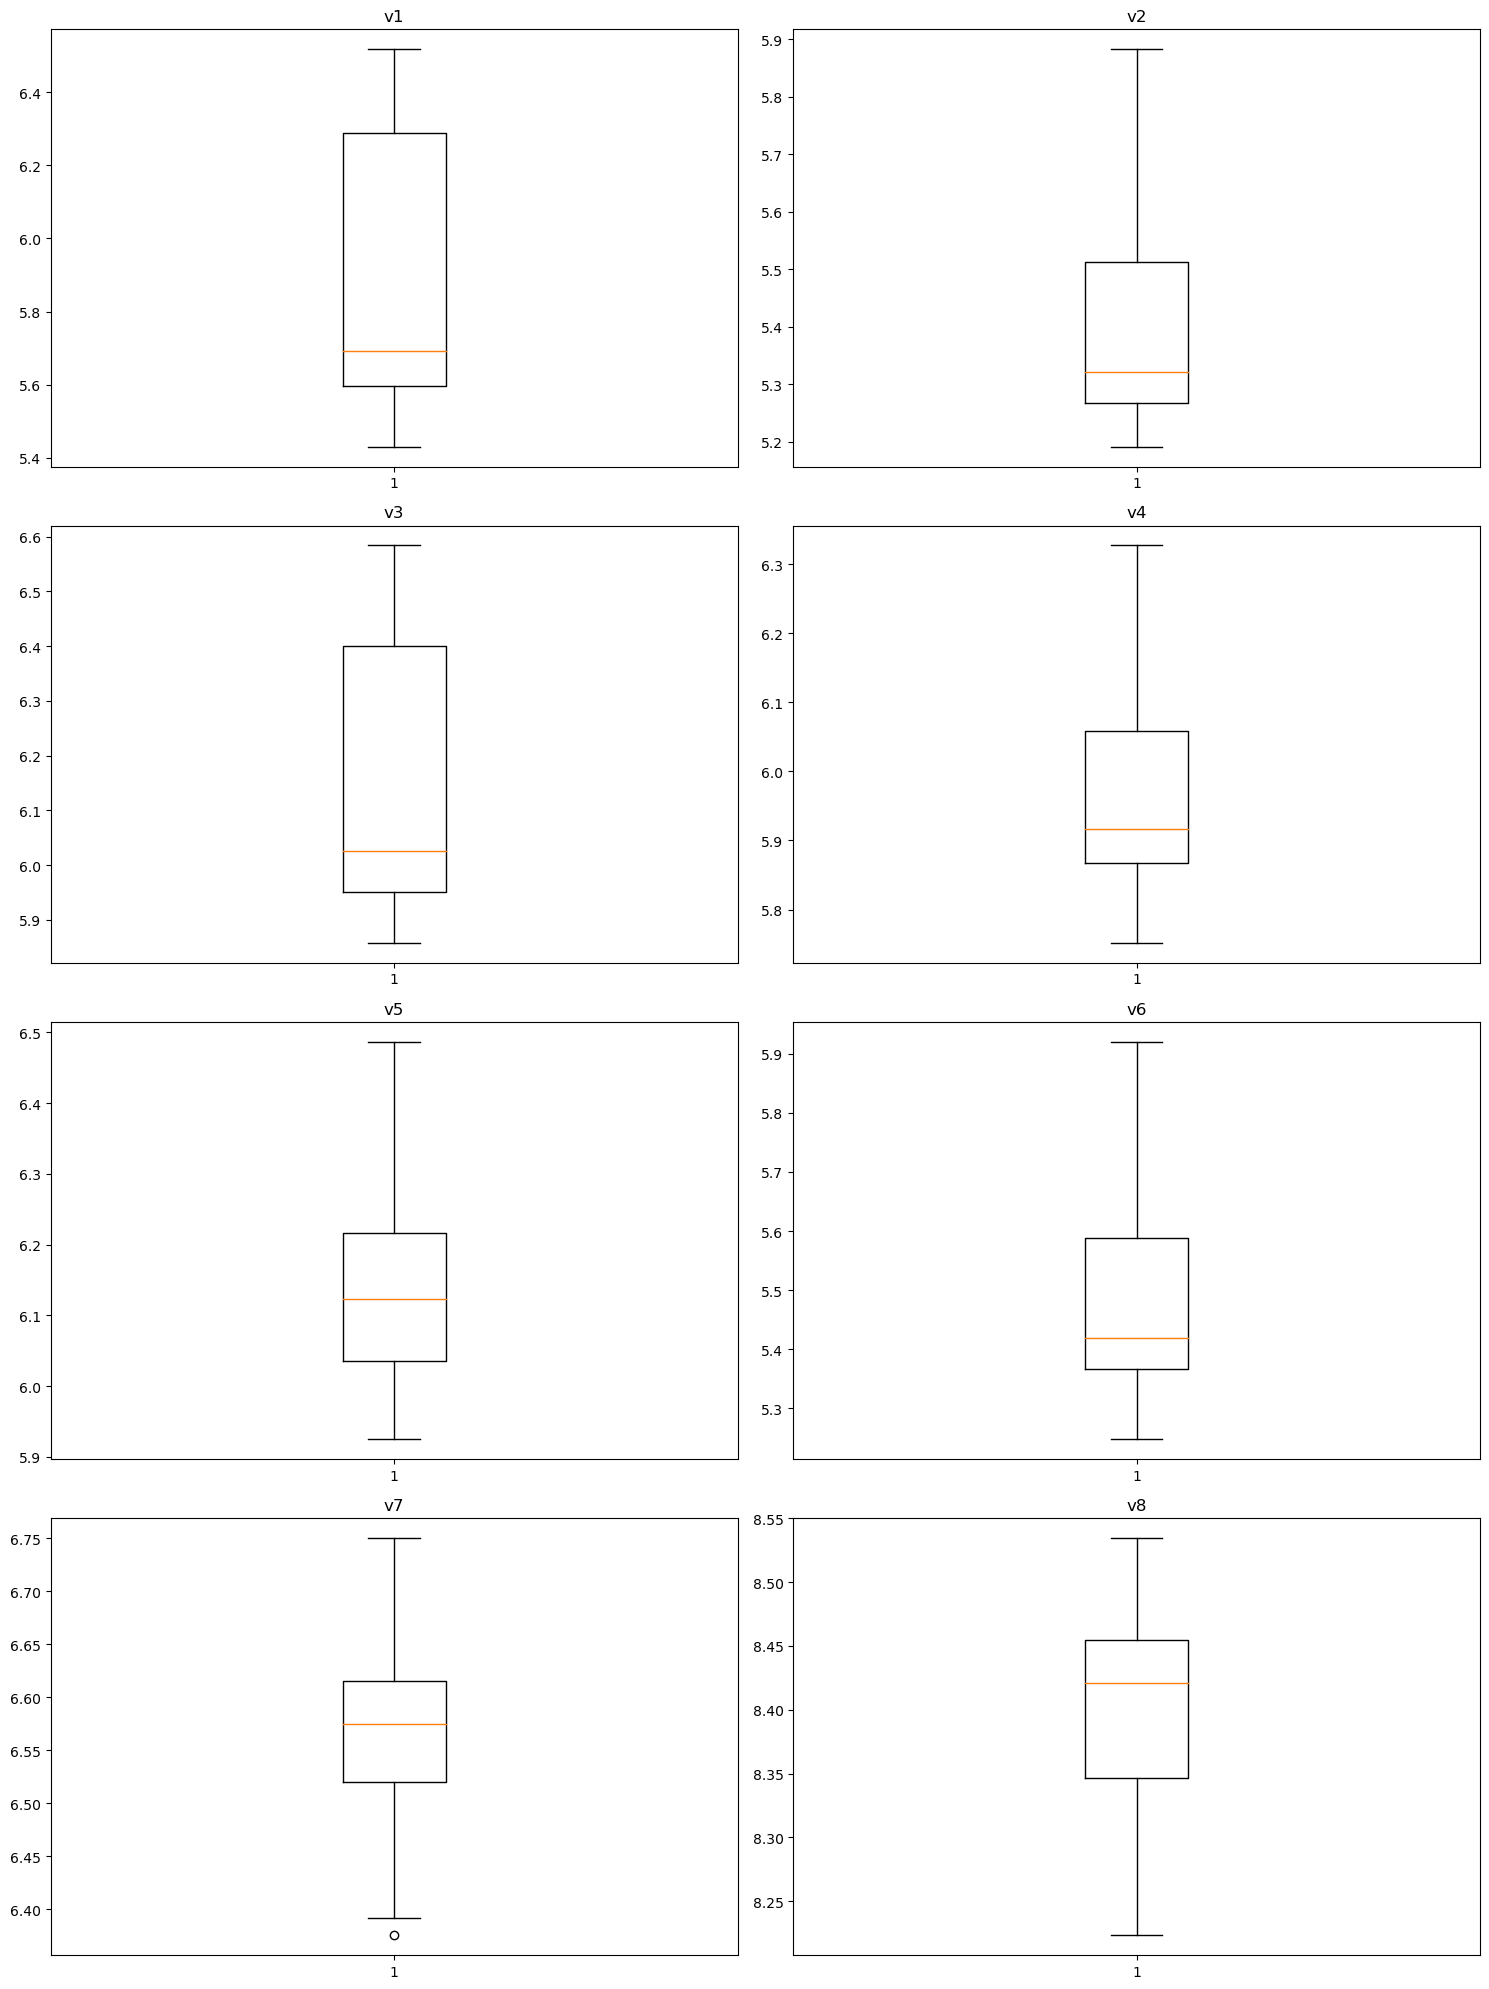

In [21]:
plt.figure(figsize=(15,20))

for i, column in enumerate(cols):
    plt.subplot(4,2, i + 1)
    plt.boxplot(data_train[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Data kemudian di split kembali, dipisah berdasarkan kolom fitur dan target.

- Fitur adalah variabel yang akan digunakan untuk memprediksi target.
- Target adalah variabel yang menjelaskan hasil prediksi

Pada machine learning, kolom target yang sudah ada pada data akan digunakan untuk bahan belajar machine learning untuk memprediksi apakah jika pada kolom fitur memiliki nilai-nilai dengan pola tertentu, bagaimana hasilnya pada target. Hasil belajar tersebut nantinya dapat digunakan untuk dilakukan prediksi pada data baru.

In [22]:
X_train = data_train.drop('target', axis=1)
y_train = data_train['target']
X_test = data_test.drop('target', axis=1)
y_test = data_test['target']

Selanjutnya, kolom-kolom numerical dan kategorical akan dipisahkan untuk dilakukan scaling dan encoding. Scaling dan encoding merubah nilai pada data menjadi bentuk kumpulan angka-angka yang memungkinkan komputer untuk mempelajarinya.

In [23]:
num_col = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
cat_col = ['sample_type']

print('Numerical Columns : ', num_col)
print('Categorical Columns : ', cat_col)

Numerical Columns :  ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
Categorical Columns :  ['sample_type']


In [24]:
X_train_num = X_train[num_col]
X_train_cat = X_train[cat_col]

X_test_num = X_test[num_col]
X_test_cat = X_test[cat_col]

In [25]:
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[ 0.99577466, -0.01298463,  0.94605182, ..., -0.29964005,
        -0.4023709 ,  0.2362309 ],
       [ 1.08844322, -0.29674101,  0.82263088, ..., -0.93913877,
        -1.23998875,  0.01438428],
       [-0.82373259, -0.94248209, -0.63449344, ..., -0.64548865,
         0.32603634,  0.28085119],
       ...,
       [-1.12041957, -0.83179469, -1.10874624, ..., -0.88519818,
        -1.63354951, -0.1135507 ],
       [-0.29067922,  0.25764415, -0.4489925 , ...,  0.0524372 ,
         0.34057872,  0.55629438],
       [ 0.89104783, -0.4329804 ,  0.81229992, ..., -0.75366964,
        -1.58375993,  0.24036913]])

In [26]:
encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

Setelah dilakukan scaling dan encoding, kolom-kolom tersebut disatukan kembali agar memudahkan untuk pemanggilannya nanti.

In [27]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final

array([[ 0.99577466, -0.01298463,  0.94605182, ..., -0.4023709 ,
         0.2362309 ,  1.        ],
       [ 1.08844322, -0.29674101,  0.82263088, ..., -1.23998875,
         0.01438428,  1.        ],
       [-0.82373259, -0.94248209, -0.63449344, ...,  0.32603634,
         0.28085119,  0.        ],
       ...,
       [-1.12041957, -0.83179469, -1.10874624, ..., -1.63354951,
        -0.1135507 ,  0.        ],
       [-0.29067922,  0.25764415, -0.4489925 , ...,  0.34057872,
         0.55629438,  0.        ],
       [ 0.89104783, -0.4329804 ,  0.81229992, ..., -1.58375993,
         0.24036913,  1.        ]])

# Model Definition

Pada kasus ini, hasil yang ingin dicapai adalah prediksi menggunakan regresi. Untuk itu, peneliti akan mencari berdasarkan data yang digunakan, model mana yang dapat memberikan performa atau hasil terbaik.

In [28]:
models = [
    ('LR', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('DT', DecisionTreeRegressor()),
    ('RF', RandomForestRegressor()),
    ('GBR', GradientBoostingRegressor())
]

In [29]:
results = []
for name, model in models:
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = -cross_val_score(model, X_train_final, y_train, cv=kf, scoring='neg_mean_squared_error')
    rmse = np.sqrt(scores.mean())
    results.append((name, rmse))

# print the results
for name, rmse in results:
    print(f'{name}: RMSE = {rmse:.2f}')

LR: RMSE = 0.19
Ridge: RMSE = 0.19
Lasso: RMSE = 0.21
ElasticNet: RMSE = 0.21
DT: RMSE = 0.24
RF: RMSE = 0.19
GBR: RMSE = 0.20


Berdasarkan hasil percobaan diatas, ditemukan bahwa Linear Regression, Ridge, dan Random Forest Regressor memiliki nilai RMSE paling rendah. Pada nilai RMSE yang menjelaskan tingkat error, semakin kecil nilainya berarti semakin baik. Maka ketiga model tersebut akan digunakan untuk nantinya diambil model yang terbaik.

Untuk memudahkan peneliti, berikut dibuatkan Pipeline untuk pengerjaan model.

In [30]:
# make scaling column
col_scale = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']

# make encode column
col_encode = ['sample_type']

# Make column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", scaler, col_scale),
        ("encode", encoder, col_encode)
        ])

# Make a model with pipeline for baseline parameter
lr_model = Pipeline(steps=[('preprocessor', preprocessor), ('LR', LinearRegression())])
ridge_model = Pipeline(steps=[('preprocessor', preprocessor), ('Ridge', Ridge())])
rf_model = Pipeline(steps=[('preprocessor', preprocessor), ('RF', RandomForestRegressor())])

# Model Training

Model-model tersebut kemudian dilakukan training untuk mempelajari pola data.

In [31]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['v1', 'v2', 'v3', 'v4', 'v5',
                                                   'v6', 'v7', 'v8']),
                                                 ('encode', OrdinalEncoder(),
                                                  ['sample_type'])])),
                ('LR', LinearRegression())])

In [32]:
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['v1', 'v2', 'v3', 'v4', 'v5',
                                                   'v6', 'v7', 'v8']),
                                                 ('encode', OrdinalEncoder(),
                                                  ['sample_type'])])),
                ('Ridge', Ridge())])

In [33]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['v1', 'v2', 'v3', 'v4', 'v5',
                                                   'v6', 'v7', 'v8']),
                                                 ('encode', OrdinalEncoder(),
                                                  ['sample_type'])])),
                ('RF', RandomForestRegressor())])

# Model Evaluation

Model yang sudah dilakukan training, berikutnya akan dievaluasi berdasarkan nilai error dan performa model (R2_score).

In [34]:
# Evaluate linear regression model
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear regression MSE: {lr_mse:.2f}")
print(f"Linear regression R^2: {lr_r2:.2f}")

Linear regression MSE: 0.04
Linear regression R^2: 0.27


Pada Linear Regression ditemukan bahwa nilai error hanya sebesar 0.04 yang menunjukkan hasil yang baik. Namun pada penilaian R2_score, model hanya menghasilkan nilai 0.27 yang menunjukkan kemampuan model dalam mengikuti pola data hanya sebesar 27%.

In [35]:
# Evaluate ridge regression model
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge regression MSE: {ridge_mse:.2f}")
print(f"Ridge regression R^2: {ridge_r2:.2f}")

Ridge regression MSE: 0.04
Ridge regression R^2: 0.29


Pada Ridge Regression juga ditemukan nilai error yang sama dengan Linear Regression. Pada penilaian R2_score, ridge regression sedikit lebih baik dari Linear Regression dengan nilai 0.29 atau kemampuan model dalam mengikuti pola data adalah sebesar 29%.

In [36]:
# Evaluate random forest regression model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random forest regression MSE: {rf_mse:.2f}")
print(f"Random forest regression R^2: {rf_r2:.2f}")

Random forest regression MSE: 0.04
Random forest regression R^2: 0.30


Pada Model Random Forest ditemukan nilai error yang sama dengan kedua model sebelumnya dan nilai R2_score yang lebih baik lagi. Dari ketiga model, model Random Forest lah yang memiliki kinerja terbaik dalam mengikuti pola data dengan nilai sebesar 30% atau 0.30.

In [37]:
rf_pred

array([4.6591, 4.7556, 4.6284, 4.898 , 4.6206, 4.6852, 4.9411, 4.5026,
       4.6282, 4.8151, 4.5913, 4.6768, 4.7005, 4.7908, 4.6434, 4.851 ,
       4.6011, 4.7159, 4.6594, 4.6229, 4.7328, 4.8835, 4.7946, 4.7026,
       4.7051, 4.7624, 4.6755, 4.8936, 4.8655, 4.6252, 4.7687, 4.7357])

In [38]:
lr_pred

array([4.69898501, 4.73573894, 4.64439659, 4.91123787, 4.64481007,
       4.73931942, 4.79281815, 4.5775211 , 4.71293374, 4.73371401,
       4.49368373, 4.64006005, 4.71136658, 4.78516448, 4.80379509,
       4.6856906 , 4.67494934, 4.75118089, 4.68044939, 4.6787696 ,
       4.65720477, 4.98980051, 4.66225054, 4.64604163, 4.73656398,
       4.70503335, 4.74492171, 4.94648291, 4.90041729, 4.60972363,
       4.81781733, 4.60122786])

In [39]:
ridge_pred

array([4.69845152, 4.73631107, 4.67013909, 4.90780371, 4.64537219,
       4.69291863, 4.78963956, 4.57693134, 4.72731066, 4.75248304,
       4.52072174, 4.60100438, 4.68044337, 4.74345454, 4.74953327,
       4.72844214, 4.68382843, 4.74658792, 4.62869982, 4.68976621,
       4.64455367, 4.98535305, 4.62156207, 4.64608418, 4.73601735,
       4.71409512, 4.74093896, 4.94721804, 4.92543714, 4.61748439,
       4.82358872, 4.62031392])

# Model Tuning

Berikutnya akan dilakukan percobaan penggantian parameter di model-model yang ada dengan harapan akan meningkatkan kinerja model menjadi lebih baik. Tuning model akan dilakukan dengan GridSearchCV, sebuah pencarian parameter otomatis untuk menentukan parameter mana yang kira-kira terbaik pada model. Hasilnya tidak selalu 100% lebih baik, tapi peneliti akan mencobanya.

In [40]:
lr_param_grid = {'LR__fit_intercept': [True, False]}
scorer = make_scorer(r2_score)

lr_grid = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring=scorer)
lr_grid.fit(X_train, y_train)

print(f"Best hyperparameters for Linear Regression: {lr_grid.best_params_}")
print(f"Best score for Linear Regression: {lr_grid.best_score_:.2f}")

Best hyperparameters for Linear Regression: {'LR__fit_intercept': True}
Best score for Linear Regression: 0.15


In [41]:
lr_pred_grid = lr_grid.predict(X_test)
lr_mse_grid = mean_squared_error(y_test, lr_pred_grid)
lr_r2_grid = r2_score(y_test, lr_pred_grid)
print(f"Linear regression MSE: {lr_mse_grid:.2f}")
print(f"Linear regression R^2: {lr_r2_grid:.2f}")

Linear regression MSE: 0.04
Linear regression R^2: 0.27


In [42]:
ridge_param_grid = {'Ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
scorer = make_scorer(r2_score)

ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring=scorer)
ridge_grid.fit(X_train, y_train)

print(f"Best hyperparameters for Ridge Regression: {ridge_grid.best_params_}")
print(f"Best score for Ridge Regression: {ridge_grid.best_score_:.2f}")

Best hyperparameters for Ridge Regression: {'Ridge__alpha': 10}
Best score for Ridge Regression: 0.19


In [43]:
ridge_pred_grid = ridge_grid.predict(X_test)
ridge_mse_grid = mean_squared_error(y_test, ridge_pred_grid)
ridge_r2_grid = r2_score(y_test, ridge_pred_grid)
print(f"Ridge regression MSE: {ridge_mse_grid:.2f}")
print(f"Ridge regression R^2: {ridge_r2_grid:.2f}")

Ridge regression MSE: 0.04
Ridge regression R^2: 0.31


In [44]:
param_grid = {
    'RF__n_estimators': [100, 200, 500],
    'RF__max_depth': [5, 10, None],
    'RF__min_samples_split': [2, 5, 10]
}
scorer = make_scorer(r2_score)

rf_grid = GridSearchCV(rf_model, param_grid, cv=5, scoring=scorer)
rf_grid.fit(X_train, y_train)

print(f"Best hyperparameters: {rf_grid.best_params_}")
print(f"Best score: {rf_grid.best_score_:.2f}")

Best hyperparameters: {'RF__max_depth': None, 'RF__min_samples_split': 5, 'RF__n_estimators': 100}
Best score: 0.19


In [45]:
rf_pred_grid = rf_grid.predict(X_test)
rf_mse_grid = mean_squared_error(y_test, rf_pred_grid)
rf_r2_grid = r2_score(y_test, rf_pred_grid)
print(f"Random Forest regression MSE: {rf_mse_grid:.2f}")
print(f"Random Forest regression R^2: {rf_r2_grid:.2f}")

Random Forest regression MSE: 0.04
Random Forest regression R^2: 0.31


Berdasarkan hasil model tuning diatas, terdapat peningkatan khususnya pada Ridge Regression dari r2_score 0.29 menjadi 0.31, dan pada Random Forest dari 0.30 menjadi 0.31. Model yang akan digunakan peneliti adalah Random Forest yang telah di tuning.

In [55]:
rf_pred_grid

array([4.69809076, 4.71234544, 4.61031577, 4.91234296, 4.6085112 ,
       4.68827469, 4.9285208 , 4.51248433, 4.61491456, 4.82630463,
       4.57308306, 4.68011707, 4.70845152, 4.76022417, 4.65749937,
       4.84296008, 4.60431949, 4.71912992, 4.66516067, 4.62262017,
       4.74295314, 4.89786901, 4.79908921, 4.71766425, 4.69059226,
       4.73524778, 4.69185985, 4.90871246, 4.86347836, 4.61685579,
       4.73711468, 4.74382154])

# Model Saving

In [50]:
with open('rf_grid.pkl', 'wb') as file_1:
  joblib.dump(rf_grid, file_1)

In [51]:
rf_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         ['v1',
                                                                          'v2',
                                                                          'v3',
                                                                          'v4',
                                                                          'v5',
                                                                          'v6',
                                                                          'v7',
                                                                          'v8']),
                                                                        ('encode',
                           

# Model Inference

In [48]:
sample_val = ['lab 1', 'lab 2']

np.random.seed(14) 
v1 = np.random.uniform(227.285714,678.375000,size=20)
v2 = np.random.uniform(178.800000,422.812500,size=20)
v3 = np.random.uniform(348.933333,722.312500,size=20)
v4 = np.random.uniform(313.733333,558.500000, size=20)
v5 = np.random.uniform(373.333333,721.000000, size=20)
v6 = np.random.uniform(189.200000,415.375000,size=20)
v7 = np.random.uniform(586.266667,853.466667,size=20)
v8 = np.random.uniform(3725.666667,5086.375000,size=20)
sample_type = np.random.choice(sample_val, size=20)


data_inf = pd.DataFrame({'v1' : v1, 'v2' : v2, 
                        'v3' : v3, 'v4' : v4, 
                        'v5' : v5, 'v6' : v6, 
                        'v7' : v7, 'v8' : v8, 'sample_type' : sample_type})
data_inf.head()

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,459.120050,391.212748,480.223332,465.719614,452.781272,242.792611,606.639634,4308.823838,lab 2
1,576.052185,205.668504,615.829118,465.750622,385.755366,278.024293,641.384221,5029.343566,lab 1
2,619.926317,252.026194,482.392251,350.490588,708.668012,207.896805,823.625340,3991.944225,lab 1
3,230.915606,294.682943,368.206626,445.485000,399.290108,375.466602,696.541468,4428.594024,lab 2
4,367.004271,343.004971,466.890908,343.190327,627.296964,254.676827,640.912006,4272.119253,lab 2


In [56]:
cols = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']

for col in cols:
    data_inf[col] = np.log(1 + data_inf[col])

In [57]:
data_inf['Nutrition Prediction'] = rf_grid.predict(data_inf)
data_inf

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type,Nutrition Prediction
0,6.131487,5.971804,6.176331,6.145729,6.117615,5.496318,6.409582,8.368652,lab 2,4.839925
1,6.357933,5.331116,6.424592,6.145795,5.957792,5.631299,6.465187,8.523244,lab 1,4.886012
2,6.431212,5.533493,6.180828,5.862183,6.564797,5.341840,6.714929,8.292284,lab 1,4.669449
3,5.446374,5.689288,5.911356,6.101406,5.992190,5.930829,6.547562,8.396063,lab 2,4.692345
4,5.908095,5.840656,6.148235,5.841195,6.443013,5.543914,6.464451,8.360099,lab 2,4.779311
5,6.492619,5.491644,6.583224,5.864168,6.308246,5.426237,6.522044,8.320218,lab 1,4.790536
6,6.130677,5.860472,6.125626,6.051906,6.007660,5.425378,6.547368,8.422587,lab 1,4.782833
7,5.918519,5.829287,6.258354,6.039673,6.321655,5.533660,6.670866,8.251945,lab 2,4.673053
8,6.155947,5.412593,6.436899,6.203162,6.263963,5.256439,6.434268,8.389455,lab 1,4.912965
9,5.793292,5.554460,6.554337,5.807365,6.336579,5.884853,6.704016,8.382916,lab 2,4.640386


# Overall Analysis

- Penelitian dilakukan untuk memprediksi tingkat nutrisi pada tanaman.
- Kolom-kolom yang digunakan adalah target, v1 - v8, dan sample_type.
- Pada data yang disediakan, tidak terdapat kekosongan data/missing value dan tidak terdapat duplikasi data.
- Distribusi data pada semua kolom numeric memiliki moderate-skew atau sedikit terdistribusi kurang normal. Hal ini kemudian dihandle mengguakan log transformation dan outlier di handle dengan capping.

- Model yang kemudian digunakan dalam penelitian setelah identifikasi beberapa model menggunakan cross-validation adalah Linear Regression, Ridge Regression, dan Random Forest Regressor.
- Dari ketiga model, dilakukan training dan evaluasi terhadap data_test dan ditemukan tingkat error (MSE) yang sama pada ketiga model yaitu sebesar 0.04 dan tingkat r2_score sebesar 0.27, 0.29, dan 0.30 secara berurutan pada Linear Regression, Ridge, dan Random Forest.
- Dilakukan model tuning pada ketiganya, terjadi improvement pada model Ridge Regression dan Random Forest dengan keduanya memiliki r2_score 0.31.

- Model terbaik yang dipilih peneliti adalah Random Forest Regressor yang telah di tuning dengan tingkat error (MSE) 0.04, dan kemampuan model dalam mengikuti pola data sebesar 31% / 0.31 (R2_score).

`Hasil yang didapat dari pembuatan model masih kurang maksimal, kemungkinan untuk meningkatkan hasil pada model adalah penambahan atau pergantian metode pada data_preprocessing, pengurangan jumlah fitur, dan mungkin penggunaan model lain yang langsung di tuning saat pemilihan model`